# Demo về momentum gradient descent

In [14]:
import warnings
warnings.filterwarnings('ignore')

import random
import math
import numpy as np
import matplotlib.pyplot as plt

In [15]:
data = np.random.randn(500, 2)

In [16]:
data[0]

array([ 0.00847945, -1.78529548])

In [17]:
data[0, 0]

0.008479450849169083

In [18]:
data[0, 1]

-1.7852954807595998

In [19]:
theta = np.zeros(2)

In [20]:
theta

array([0., 0.])

In [21]:
def loss_function(data, theta):
    m = theta[0]
    b = theta[1]
    loss = 0
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        y_hat = m*x + b
        loss = loss + (y - y_hat)**2
        
    mse = loss / float(len(data))
    return mse

In [22]:
loss_function(data, theta)

0.9485025574463777

In [23]:
def compute_gradients(data, theta):
    gradients = np.zeros(2)
    N = float(len(data))
    m = theta[0]
    b = theta[1]
    
    for i in range(len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        gradients[0] += -(2/N) * x * (y - (m*x + b)) # gradient theo m
        gradients[1] += -(2/N) * (y - (theta[0]*x + b)) # gradient theo b
        
    epsilon = 1e-6
    gradients = np.divide(gradients, N + epsilon) # cộng thêm một epsilon để tránh lỗi chia cho 0
    
    return gradients

In [24]:
compute_gradients(data, theta)

array([-1.22279613e-04, -1.68221294e-05])

In [25]:

def momentum(data, theta, lr=1e-2, gamma=0.9, num_iterations=2000):
    loss = []
    vt = np.zeros(theta.shape[0])
    
    for t in range(num_iterations):
        gradients = compute_gradients(data, theta)
        vt = gamma * vt + lr*gradients
        theta = theta - vt
        loss.append(loss_function(data, theta))
        
    return theta, loss

[0.016494   0.00267011]


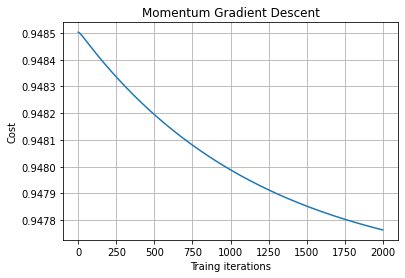

In [26]:
theta, loss = momentum(data, theta)

print(theta)

plt.plot(loss)
plt.grid()
plt.xlabel('Traing iterations')
plt.ylabel('Cost')
plt.title('Momentum Gradient Descent')
plt.show()